In [1]:
# homework discussion group member: Xin Hu, Yunxi Zhang

## 1.1
#### Use LASSO regression to predict Salary from the other numeric predictors.
#### Create a visualization of the coefficient trajectories. 
#### Comment on which are the final three predictors that remain in the model. 
#### Use cross-validation to find the optimal value of the regularization penality. 
#### How many predictors are left in that model?

#### import the packages 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale 

#### data cleaning and pre-processing 

In [2]:
# data cleaning 
data=pd.read_csv('Hitters.csv')
# (1)only keep numeric predictors, remove categorical columns 
data=data.drop(columns=['League', 'Division', 'NewLeague'])
# (2) remove rows with NA value 
data=data.dropna()
# (3) remove the first column 
data=data.drop(['Unnamed: 0'], axis=1)
# (4) separate the data into variables(x) and target(y)
x=data.drop(['Salary'],axis=1)
y=data.Salary


# (5) Split data into training set and testing set 
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [3]:
# scale the numeric features before lasso and ridge regression 
x_train=scale(x_train)
x_test=scale(x_test)

/Users/qianyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
/Users/qianyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


#### Lasso Regression 

In [4]:
# build a list of lambda, with 100 different values ranging from very small to very large 
lambda_value = 10**np.linspace(10,-2,100)*0.5
lasso = Lasso(max_iter = 10000, normalize = True)

# create a new list to store coefficient for each predictors under different lambda value 
coefs = []
# create a dictionary to store lambda value with its coefficient 
dictionary={}

for a in lambda_value:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)
    dictionary[a]=lasso.coef_
        

#### Visualization 

Text(0, 0.5, 'weights')

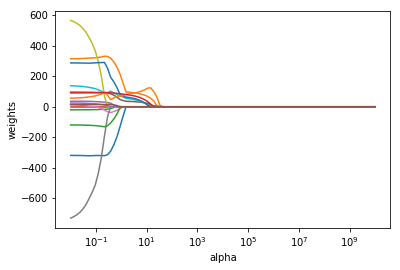

In [5]:
ax = plt.gca()
ax.plot(lambda_value*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')


#### Find an appropriate lambda value that only 3 variables have non-zero coefficient (for training set)

In [6]:
for i in dictionary: 
    counter=0
    for each in dictionary[i]: 
        if each !=0:
            counter+=1
    if counter==3:
        print("when lambda value equals to ", i, " the coefficient will have 3 non-zero values")
        print("when lambda value equals to ", i,"the coefficient of all predictors are: ", dictionary[i])

when lambda value equals to  12.38538177995857  the coefficient will have 3 non-zero values
when lambda value equals to  12.38538177995857 the coefficient of all predictors are:  [ 0.          7.30439999  0.          0.          3.75313792  0.
  0.          0.          0.          0.          0.         65.36460074
  0.          0.          0.          0.        ]


#### For the training set, when lambda is around 12, the lasso regression will result in just 3 non-zero coefficient value.
#### However, since we have a small dataset (262 records in total), the lambda value may vary due to difference between training set and the overall set. 
#### After tried multiple values near 12, when lambda=11 or lambda=10, we can see the coefficient output with only 3 non-zero values

#### According to the coefficient table below, "Hits", "CRuns" and "CRBI" are the final three predictors that remain in the model

In [7]:
lasso = Lasso(alpha=11, max_iter=10000, normalize=True)
lasso.fit(x, y)
pd.Series(lasso.coef_, index=x.columns)

AtBat      0.000000
Hits       0.037439
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.062909
CRBI       0.176160
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

In [8]:
lasso = Lasso(alpha=10, max_iter=10000, normalize=True)
lasso.fit(x, y)
pd.Series(lasso.coef_, index=x.columns)

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

#### Cross-validation for Lasso Regression 

In [9]:
# Lasso with 5-fold cross validation 
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 10000, normalize = True)
lassocv.fit(x_train, y_train)

# the optimal lambda value 
print('The optimal optimal value of the regularization penality is',  lassocv.alpha_)

The optimal optimal value of the regularization penality is 0.06908886763991272


In [10]:
# Build Lasso regression model with the optimal lambda value generated by cross-validation 
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x, y)
mean_squared_error(y_test, lasso.predict(x_test))

# Check the coefficient table with optimal lambda value
pd.Series(lasso.coef_, index=x.columns)

AtBat     -2.069759
Hits       6.979941
HmRun      0.000000
Runs      -0.581855
RBI        0.480022
Walks      5.465287
Years     -6.374196
CAtBat    -0.080898
CHits      0.000000
CHmRun     0.184016
CRuns      1.192017
CRBI       0.566938
CWalks    -0.680604
PutOuts    0.292290
Assists    0.299036
Errors    -2.421782
dtype: float64

#### By using the optimal lambda value (0.06908886763991272), there are 14 variables left in the model 

### 1.2
### Repeat with Ridge Regression. Visualize coeffiecient trajectories. 
### Use cross-validation to find the optimal vaule of the regularization penalty.

#### Ridge Regression 

In [11]:
# build a list of lambda, with 100 different values ranging from very small to very large 
lambda_value = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge(normalize = True)

# create a new list to store coefficient for each predictors under different lambda value 
coefs = []

for a in lambda_value:
    ridge.set_params(alpha=a)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)

#### Visualization

Text(0, 0.5, 'weights')

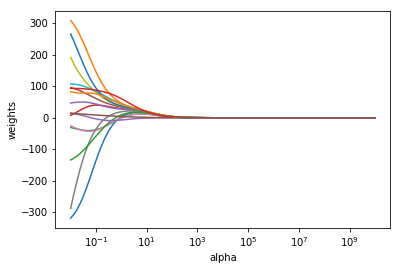

In [12]:
ax = plt.gca()
ax.plot(lambda_value*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

#### Use cross-validation for ridge regression 

In [13]:
ridgecv=RidgeCV(alphas=lambda_value, scoring='neg_mean_squared_error',normalize=True)
ridgecv.fit(x_train, y_train)
print('The optimal alpha (regularization penalty): ', ridgecv.alpha_)

The optimal alpha (regularization penalty):  0.015269277544167062


### 2 Short Answer. 
#### (1) Explain in your own words the bias-variance tradeoff. 
#### (2) What role does regularization play in this tradeoff? 
#### (3) Make reference to your findings in number (1) to describe models of high/low bias and variance.

#### (1) Bias-Variance trade-off: Basically, bias means the error between real value and the predicted value by a model. Variance means the extent of a model change by using different training data set. When the model is low bias high variance, there will be a problem of overfitting; When the model is low variance high bias, there will be a problem of underfitting. In real life modeling, it might be hard to find both low variance and low bias situation, so there's a trade-off between them. In order to minimize the  test error of a model, we want to select a statistical learning method that has both relatively low variance and relatively low bias.  

#### (2) The regularization helps reduce the variance and prevent overfitting. The regularization performed a feature selection by adding a penalty term to shrink the contribution of each independent features. 

#### (3)  According to the cross-validation results, Lasso regression got optimal lambda value of 0.06908886763991272 while ridge regression got optimal lambda of  0.015269277544167062. With the penalty term, the regression will achieve a smaller MSE, which means the regularization reduced overfitting, lower variance but higher the bias. Thus, the cross validation generated a non-zero value for lambda. 